<a href="https://colab.research.google.com/github/PARKHYOUNJUNG/phj_lms23/blob/main/CODE/PHJ_20days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [pykrx](https://github.com/sharebook-kr/pykrx)
- [네이버증권](https://finance.naver.com/)

In [1]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 9.0 MB/s eta 0:00:00


In [57]:
from pykrx import stock
import pandas as pd

In [26]:
# ticker(주식번호) 와 종목명
df_tic = pd.DataFrame({'ticker':[],'tic_name':[]})

for ticker in stock.get_market_ticker_list(date='20230331',market='KOSPI'):
  df_tic.loc[len(df_tic)]=[ticker,stock.get_market_ticker_name(ticker)]

df_tic.tail()

,ticker,tic_name
941,005010,휴스틸
942,000540,흥국화재
943,000547,흥국화재2우B
944,000545,흥국화재우
945,003280,흥아해운


In [41]:
# 네이버 ticker 찾기기
ticker = df_tic[df_tic['tic_name']=='NAVER']['ticker'].values[0]
ticker

'035420'

In [44]:
start_date = "20180401"
end_date = "20230331"
# today = "20230410"
ticker
df = stock.get_market_ohlcv(start_date, end_date, ticker)
# df

In [45]:
len(df)

1233

In [46]:
df['']

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2023-03-27,201500,202000,198200,199300,611569,121929314900,-1.58
2023-03-28,199600,201000,197800,199500,586388,116774872500,0.10
2023-03-29,198000,201000,198000,199100,442034,87965921900,-0.20
2023-03-30,200500,201000,198100,201000,788108,157655600600,0.95
2023-03-31,203500,203500,199100,202000,937726,188788645700,0.50


In [52]:
import seaborn as sns

KeyError: ignored

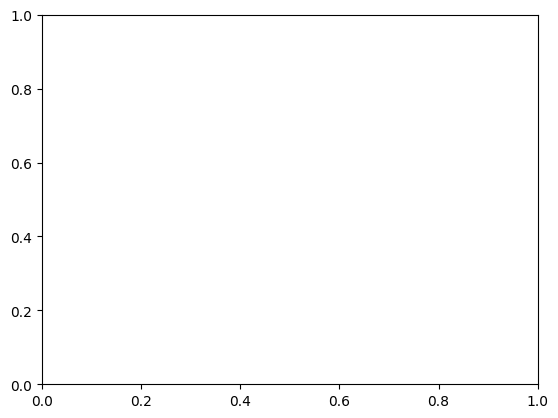

In [55]:
sns.lineplot(y=df['종가'])

In [ ]:
# 중복값확인
df_ind.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5040    False
5041    False
5042    False
5043    False
5044    False
Length: 5045, dtype: bool

In [ ]:
# 결측치 확인
df_ind.isna().sum()

tic_index         0
tic_index_name    0
ticker            0
dtype: int64

In [ ]:
len(set(df_tic['ticker'].unique())-set(df_ind['ticker'].unique()))

124

In [ ]:
# ticker(주식번호) 와 인덱스(종목구분) 
df_ind_tic=pd.merge(df_ind, df_tic, on='ticker', how = 'left' )
df_ind_tic.tail()

,tic_index,tic_index_name,ticker,tic_name
5040,1894,코스피 200 TOP 10,006400,삼성SDI
5041,1894,코스피 200 TOP 10,005380,현대차
5042,1894,코스피 200 TOP 10,000270,기아
5043,1894,코스피 200 TOP 10,035420,NAVER
5044,1894,코스피 200 TOP 10,035720,카카오


In [ ]:
# df_ind_tic[df_ind_tic['tic_name']=='국민은행']

,tic_index,tic_index_name,ticker,tic_name


In [ ]:
# ticker(주식번호) 와 인덱스(종목구분) 와 종목명 중 업종 구분만
df_ind_tic1=df_ind_tic[df_ind_tic['tic_index_name'].str.startswith('코스피') == False]
# df_ind_tic[df_ind_tic['tic_index_name'].str.startswith('코스피') == False]['tic_index_name'].unique()
df_ind_tic1['tic_index_name'].unique()

array(['음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계', '전기전자',
       '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업', '금융업', '증권',
       '보험', '서비스업', '제조업'], dtype=object)

In [ ]:
df_ind_tic1.duplicated('tic_name').sum()
# 한 주식 종목이 여러업종으로 구분되어 있음

500

In [ ]:
df_ind_tic2=df_ind_tic[df_ind_tic['tic_index_name'] == '금융업']
# df_ind_tic3=df_ind_tic[df_ind_tic['tic_index_name'] == '코스피 100']
df_ind_tic2

,tic_index,tic_index_name,ticker,tic_name
2248,1021,금융업,105560,KB금융
2249,1021,금융업,055550,신한지주
2250,1021,금융업,003550,LG
2251,1021,금융업,034730,SK
2252,1021,금융업,032830,삼성생명
...,...,...,...,...
2343,1021,금융업,005740,크라운해태홀딩스
2344,1021,금융업,000590,CS홀딩스
2345,1021,금융업,044820,코스맥스비티아이
2346,1021,금융업,001290,상상인증권


In [ ]:
df_ind_tic2[df_ind_tic2['tic_name'].str.count('KB') > 0]

,tic_index,tic_index_name,ticker,tic_name
2248,1021,금융업,105560,KB금융


In [ ]:
ticker='105560'
df = stock.get_market_trading_value_by_date(start_date, end_date, ticker)
df.head()

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2023-01-02,-6471793550,13351550,4077752600,2380689400,0
2023-01-03,-6471784900,97611500,-2385665100,8759838500,0
2023-01-04,4771394250,296267350,-7276349450,2208687850,0
2023-01-05,17226125600,-794240000,-46451403500,30019517900,0
2023-01-06,23368079100,-1038555500,-67890820900,45561297300,0


In [ ]:
df = stock.get_market_trading_value_by_investor(start_date, end_date, ticker)
df.head()

,매도,매수,순매수
투자자구분,,,
금융투자,526193192300,478340109700,-47853082600
보험,49879174850,44040288200,-5838886650
투신,119642647900,113201865900,-6440782000
사모,112051418000,85321427800,-26729990200
은행,1543085200,11260756050,9717670850


In [ ]:
df = stock.get_market_fundamental(start_date, end_date, ticker)
df

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-01-02,121808,4.28,0.39,11134,6.18,2940
2023-01-03,121808,4.41,0.40,11134,5.99,2940
2023-01-04,121808,4.54,0.41,11134,5.82,2940
2023-01-05,121808,4.84,0.44,11134,5.45,2940
2023-01-06,121808,5.09,0.47,11134,5.19,2940
...,...,...,...,...,...,...
2023-04-05,121808,4.30,0.39,11134,6.14,2940
2023-04-06,121808,4.19,0.38,11134,6.30,2940
2023-04-07,121808,4.22,0.39,11134,6.26,2940
